In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_birth = pd.read_csv("daily-total-female-births-CA.csv")

In [3]:
df_birth.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [5]:
df_birth.isna().sum()

date      0
births    0
dtype: int64

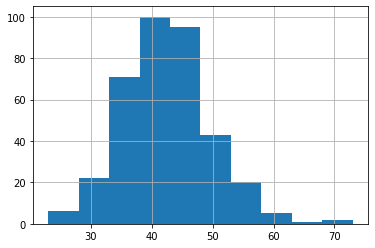

In [6]:
df_birth['births'].hist()
plt.show()

In [7]:
df = pd.read_csv("daily-total-female-births-CA.csv", index_col='date', parse_dates=[0])

In [8]:
df

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


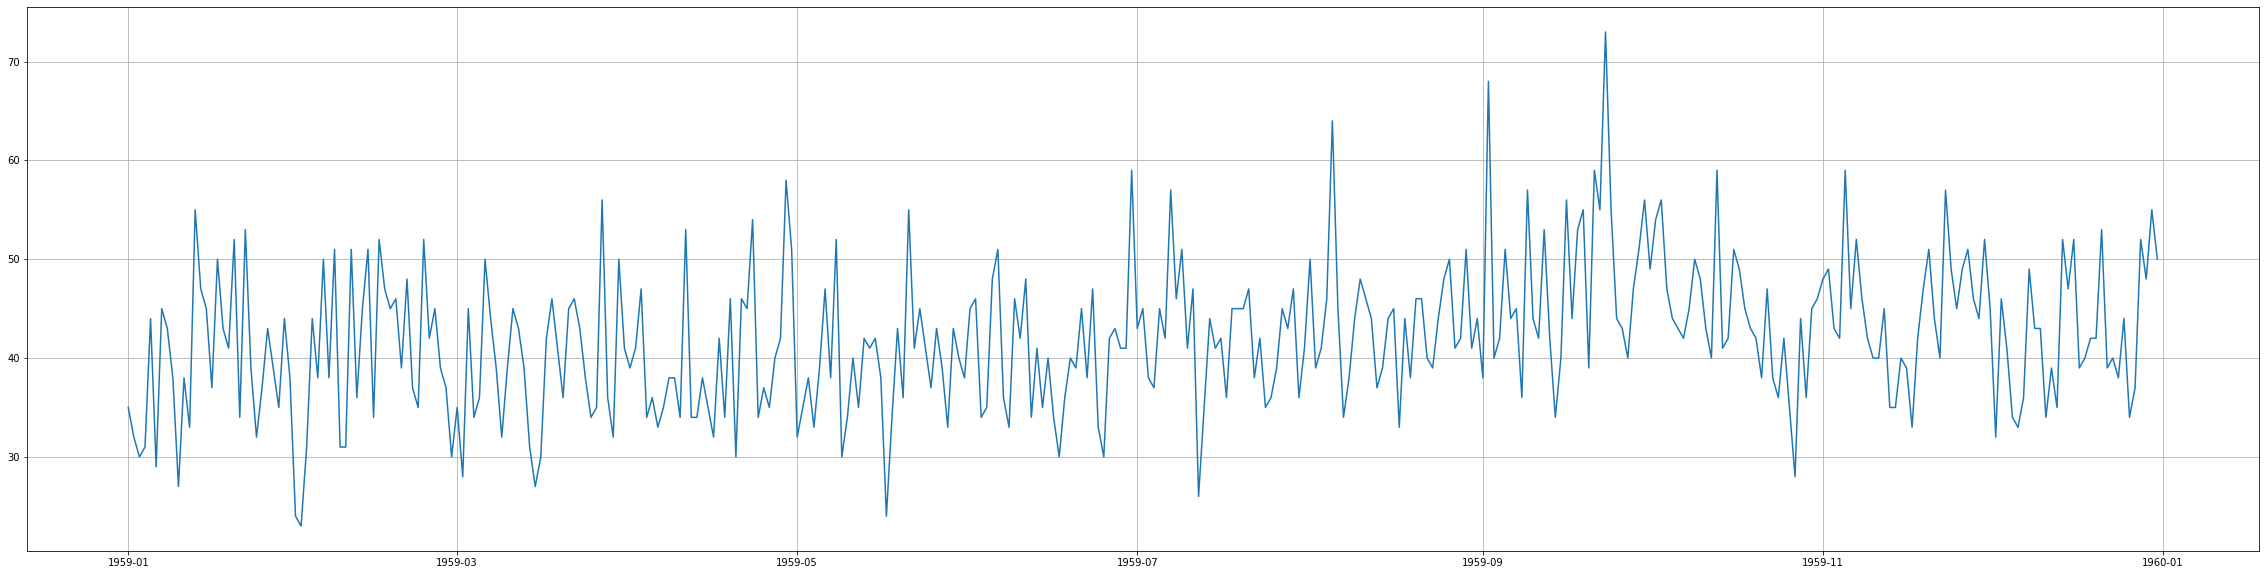

In [9]:
plt.figure(figsize=(40, 10))
plt.plot(df['births'])
plt.grid(True)
plt.show()

In [10]:
df.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [11]:
series_birth = df.values

In [12]:
series_birth

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [13]:
df.size

365

In [14]:
df.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [15]:
df_mean = df.rolling(window = 10).mean()

In [16]:
df_mean.head(20)

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
1959-01-06,NaN
1959-01-07,NaN
1959-01-08,NaN
1959-01-09,NaN


In [17]:
df_mean.duplicated().sum()

236

In [18]:
df_mean.isna().sum()

births    9
dtype: int64

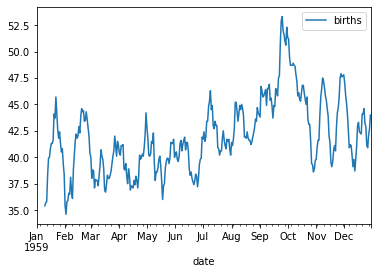

In [19]:
df_mean.plot()
plt.show()

In [20]:
value = pd.DataFrame(series_birth)

In [21]:
value.head()

,0
0,35
1,32
2,30
3,31
4,44


In [22]:
df1 = pd.concat([value, value.shift(1)], axis=1)

In [23]:
df1

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
...,...,...
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0


In [24]:
df1.columns = ['actual_birth', 'forecast_birth']

In [25]:
df1

,actual_birth,forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
...,...,...
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0


In [26]:
df1 = df1[1:]

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [28]:
birth_error = mean_squared_error(df1['actual_birth'], df1['forecast_birth'])

In [29]:
birth_error

84.22252747252747

In [30]:
df1.head()

,actual_birth,forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [31]:
np.sqrt(birth_error)

9.177283229394606

In [32]:
df1.describe()

,actual_birth,forecast_birth
count,364.000000,364.000000
mean,42.000000,41.958791
std,7.349219,7.346291
min,23.000000,23.000000
25%,37.000000,37.000000
50%,42.000000,42.000000
75%,46.000000,46.000000
max,73.000000,73.000000


# ARIMA

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

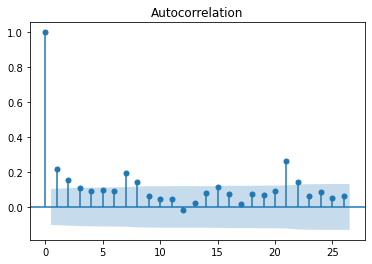

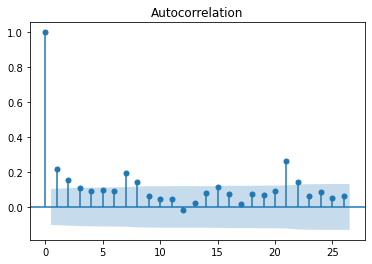

In [34]:
plot_acf(df)

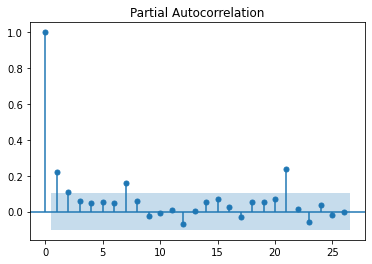

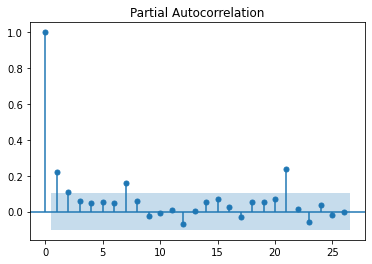

In [35]:
plot_pacf(df)

https://www.youtube.com/watch?v=2v0tkvAAj30

# train & test split

In [37]:
df.size

365

In [154]:
df_train = df[0:340]

In [155]:
df_test = df[340:365]

In [162]:
df_train.size

340

In [163]:
df_test.size

25

In [164]:
from statsmodels.tsa.arima_model import ARIMA

In [165]:
birth_model = ARIMA(df_train, order=(2,1,3))

C:\Users\Fiqih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\Fiqih\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


In [166]:
birth_model_fit = birth_model.fit()

C:\Users\Fiqih\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [167]:
birth_model_fit.aic

2298.685432949018

In [168]:
birth_forecast = birth_model_fit.forecast(steps=25)[0]

In [169]:
birth_forecast

array([43.98010477, 45.93816471, 42.28533636, 42.97805485, 45.99905001,
       43.3134911 , 42.33768439, 45.58758092, 44.32335169, 42.15665309,
       44.87852184, 45.10273469, 42.41511187, 44.08618341, 45.52349721,
       42.99819207, 43.41052218, 45.55721521, 43.73624148, 42.99472731,
       45.26620036, 44.45110115, 42.90199317, 44.77565025, 44.99716812])

In [170]:
df_test

,births
date,
1959-12-07,36
1959-12-08,49
1959-12-09,43
1959-12-10,43
1959-12-11,34
1959-12-12,39
1959-12-13,35
1959-12-14,52
1959-12-15,47


In [171]:
np.sqrt(mean_squared_error(df_test,birth_forecast))

6.333278298035634

In [172]:
df_forecast = pd.DataFrame(birth_forecast)

In [173]:
df_forecast

,0
0,43.980105
1,45.938165
2,42.285336
3,42.978055
4,45.999050
5,43.313491
6,42.337684
7,45.587581
8,44.323352
9,42.156653


In [174]:
just_birth = df_test.reset_index()

In [175]:
just_birth

,date,births
0,1959-12-07,36
1,1959-12-08,49
2,1959-12-09,43
3,1959-12-10,43
4,1959-12-11,34
5,1959-12-12,39
6,1959-12-13,35
7,1959-12-14,52
8,1959-12-15,47
9,1959-12-16,52


In [176]:
test_and_forecast = pd.concat([just_birth, df_forecast], axis=1)

In [177]:
test_and_forecast

,date,births,0
0,1959-12-07,36,43.980105
1,1959-12-08,49,45.938165
2,1959-12-09,43,42.285336
3,1959-12-10,43,42.978055
4,1959-12-11,34,45.999050
5,1959-12-12,39,43.313491
6,1959-12-13,35,42.337684
7,1959-12-14,52,45.587581
8,1959-12-15,47,44.323352
9,1959-12-16,52,42.156653


In [178]:
test_and_forecast.columns = ['date', 'actual_birth', 'forecast_birth']

In [179]:
test_and_forecast

,date,actual_birth,forecast_birth
0,1959-12-07,36,43.980105
1,1959-12-08,49,45.938165
2,1959-12-09,43,42.285336
3,1959-12-10,43,42.978055
4,1959-12-11,34,45.999050
5,1959-12-12,39,43.313491
6,1959-12-13,35,42.337684
7,1959-12-14,52,45.587581
8,1959-12-15,47,44.323352
9,1959-12-16,52,42.156653


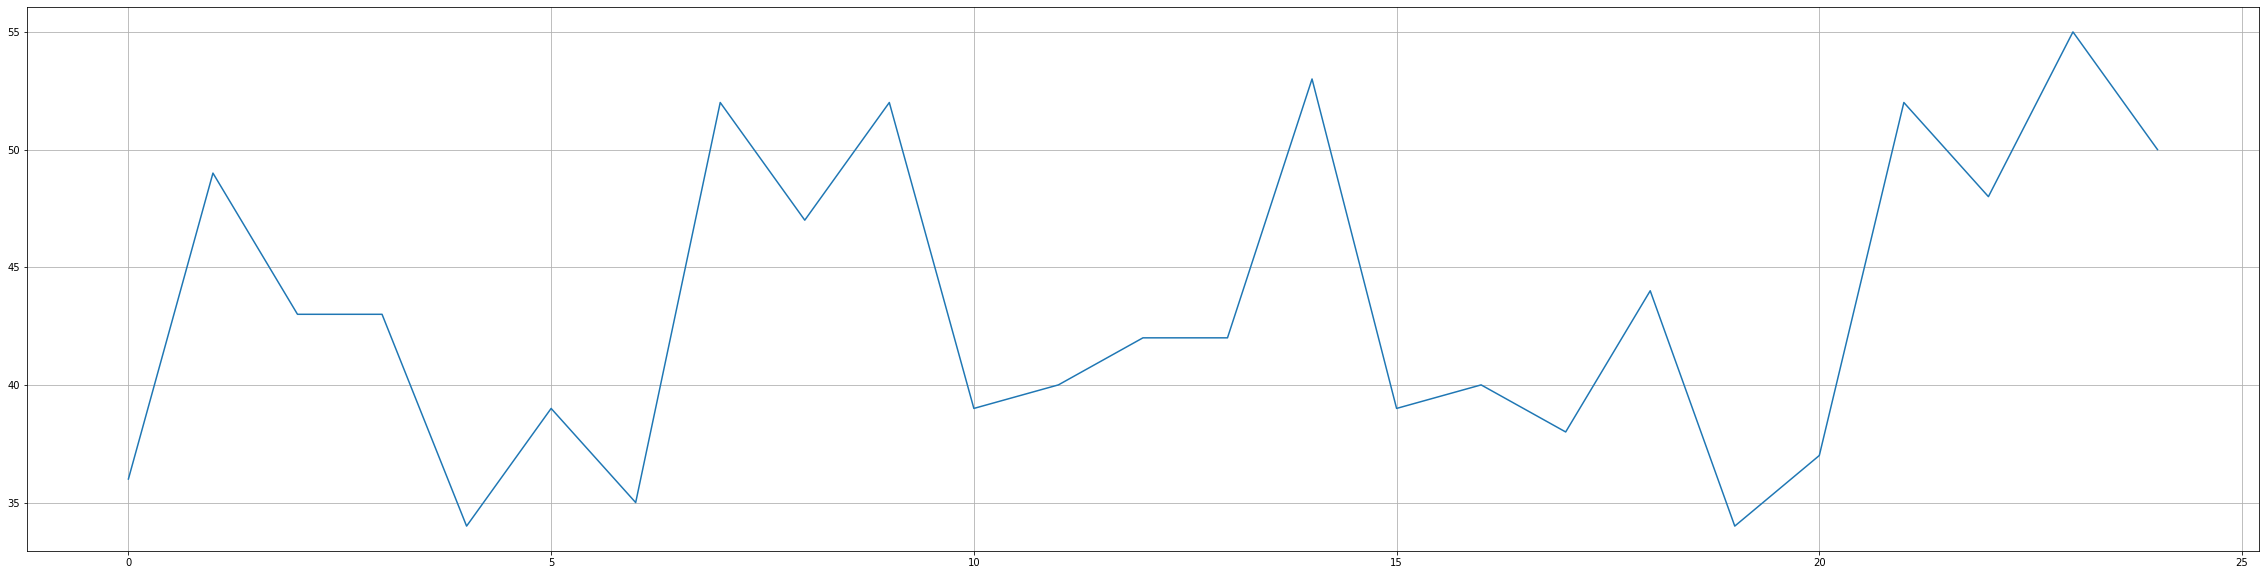

In [180]:
plt.figure(figsize=(40, 10))
plt.plot(test_and_forecast['actual_birth'])
plt.grid(True)
plt.show()

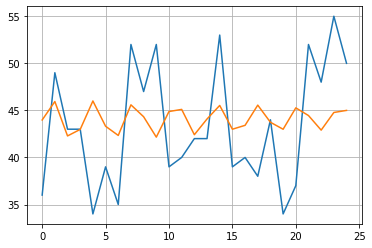

In [181]:
plt.plot(test_and_forecast['actual_birth'])
plt.plot(test_and_forecast['forecast_birth'])
plt.grid(True)
plt.show()

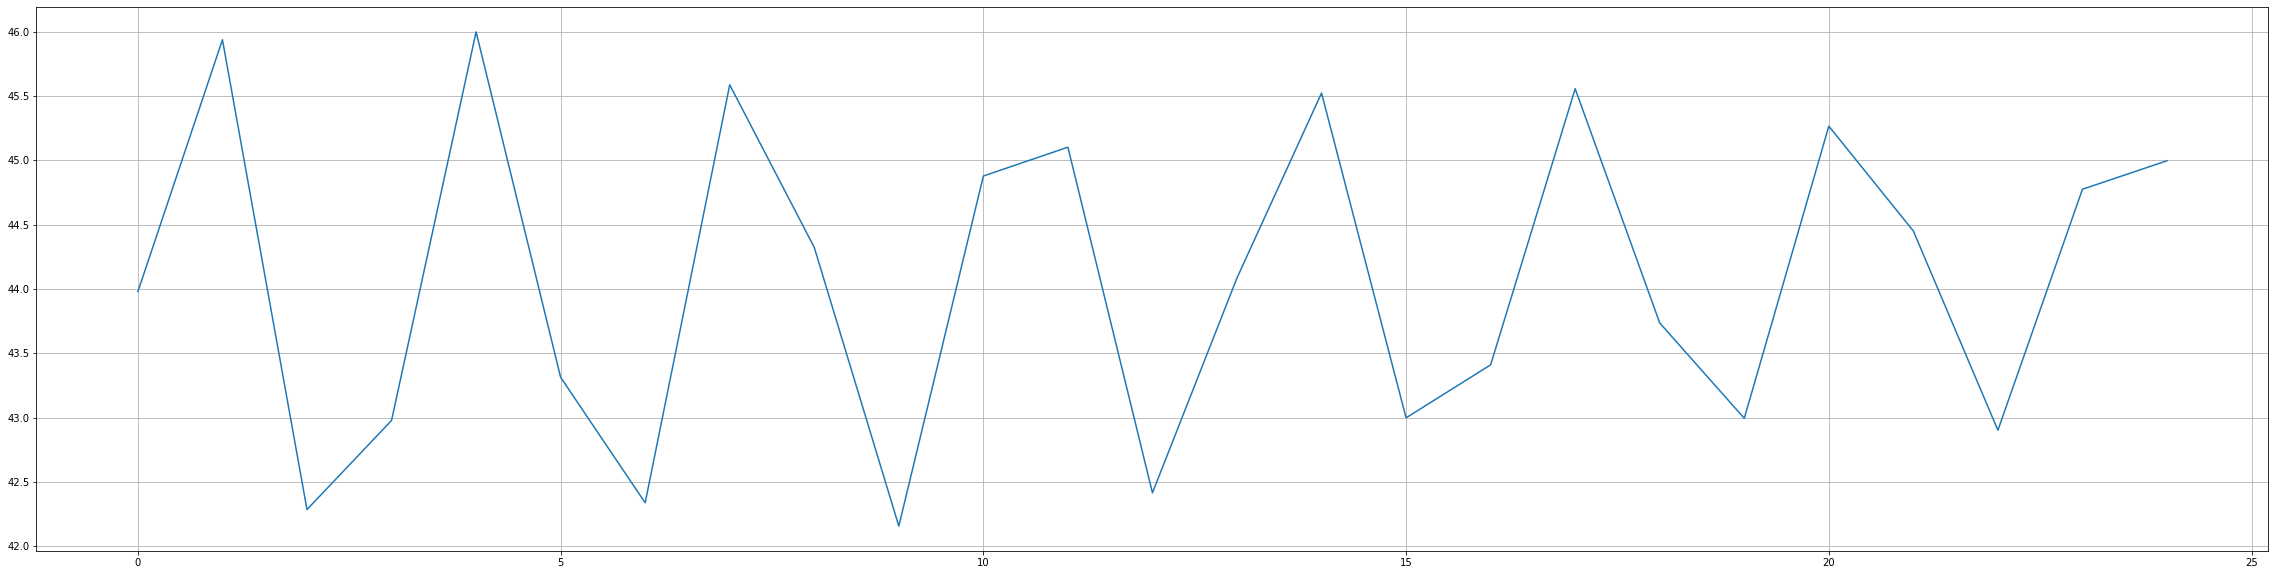

In [183]:
plt.figure(figsize=(40, 10))
plt.plot(test_and_forecast['forecast_birth'])
plt.grid(True)
plt.show()